In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import timedelta
import altair as alt
import glob
import os
import warnings
warnings.filterwarnings('ignore')

# Sleep Analysis - Data Analysis

In [2]:
df = pd.read_csv('prepared/fitbit_data_moon_crisp.csv')
df.dropna(axis=0, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df.head(10)

,date,skin_temp_avg,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,avg_bpm,Moon Phase
0,2022-03-04,30.505155,67,17,15,35,66,60,0.073479,66.494309,New Moon
2,2022-03-10,29.899359,88,21,22,45,126,60,0.054695,60.620142,First Quarter
3,2022-04-25,29.917705,56,15,15,26,23,56,0.100186,60.969515,Third Quarter
4,2022-06-08,30.016326,75,20,19,36,69,55,0.087816,59.398694,First Quarter
5,2022-01-01,30.858560,68,19,18,31,69,60,0.081197,58.885041,New Moon
8,2022-06-09,30.251775,76,22,16,38,88,54,0.070640,53.848100,First Quarter
9,2022-04-24,30.351842,68,16,15,37,49,54,0.079038,68.521044,Third Quarter
10,2022-04-30,30.165861,78,21,18,39,81,58,0.073281,61.285938,New Moon
11,2022-04-18,30.842851,84,21,22,41,71,53,0.071207,53.884582,Full Moon
12,2022-03-11,31.758999,84,21,18,45,68,58,0.092812,60.273563,First Quarter


In [4]:
import altair as alt
from altair import to_values

values = to_values(df)

alt.Chart.from_dict({
    "data": values,
    "mark": "point",
    "encoding": {
        "x": {
            "field": "date",
            "type": "temporal",
        },
        "color": {
            "field": "Moon Phase",
            "type": "nominal",
        },
         "y": {
            "field": "overall_score",
            "type": "quantitative",
        },
    }
})

alt.Chart(...)

In [5]:
values = to_values(df)

alt.Chart.from_dict({
    "data": values,
    "mark": "bar",
    "encoding": {
        "x": {
            "field": "date",
            "type": "temporal",
        },
        "y": {
            "field": "skin_temp_avg",
            "type": "nominal",
        },
    }
})

alt.Chart(...)

In [6]:
df.groupby('Moon Phase')['deep_sleep_in_minutes'].mean()

Moon Phase
First Quarter    81.225806
Full Moon        77.735294
New Moon         79.518519
Third Quarter    70.080000
Name: deep_sleep_in_minutes, dtype: float64

In [7]:
df.groupby('Moon Phase')['overall_score'].mean()

Moon Phase
First Quarter    77.903226
Full Moon        77.117647
New Moon         77.333333
Third Quarter    74.480000
Name: overall_score, dtype: float64

In [8]:
df.groupby('Moon Phase')['skin_temp_avg'].mean()

Moon Phase
First Quarter    30.779055
Full Moon        30.755357
New Moon         30.644631
Third Quarter    30.978427
Name: skin_temp_avg, dtype: float64

In [9]:
df.groupby('Moon Phase')['composition_score'].mean()

Moon Phase
First Quarter    19.645161
Full Moon        19.970588
New Moon         19.814815
Third Quarter    19.040000
Name: composition_score, dtype: float64

<AxesSubplot:xlabel='date', ylabel='overall_score'>

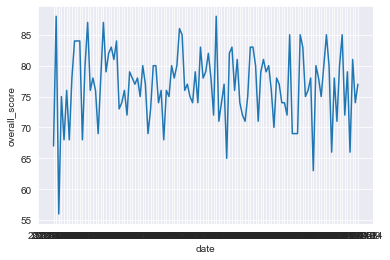

In [10]:
sns.lineplot(data=df, x="date", y="overall_score")

<AxesSubplot:xlabel='Moon Phase', ylabel='overall_score'>

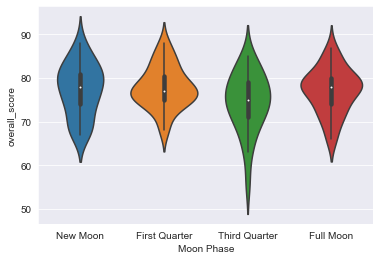

In [11]:
group = df.groupby('Moon Phase')['composition_score'].mean()

sns.violinplot(data=df, x="Moon Phase", y="overall_score")

<AxesSubplot:xlabel='date', ylabel='skin_temp_avg'>

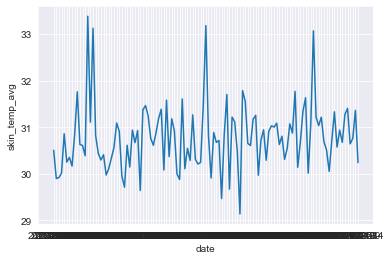

In [12]:
sns.lineplot(data=df, y="skin_temp_avg", x='date')